In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [2]:
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train= pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [4]:
train

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [5]:
test

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...,...
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [6]:
train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
train.nunique()

id                90615
Sex                   3
Length              157
Diameter            126
Height               90
Whole weight       3175
Whole weight.1     1799
Whole weight.2      979
Shell weight       1129
Rings                28
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [9]:
train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [10]:
# train_en = pd.get_dummies(train, columns=['Sex'], dtype= int)

# test_en = pd.get_dummies(test, columns=['Sex'], dtype=int)

In [11]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

In [12]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [13]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [14]:
features = train.drop('Rings', axis=1)
features

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...
90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450
90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400
90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815
90613,1,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700


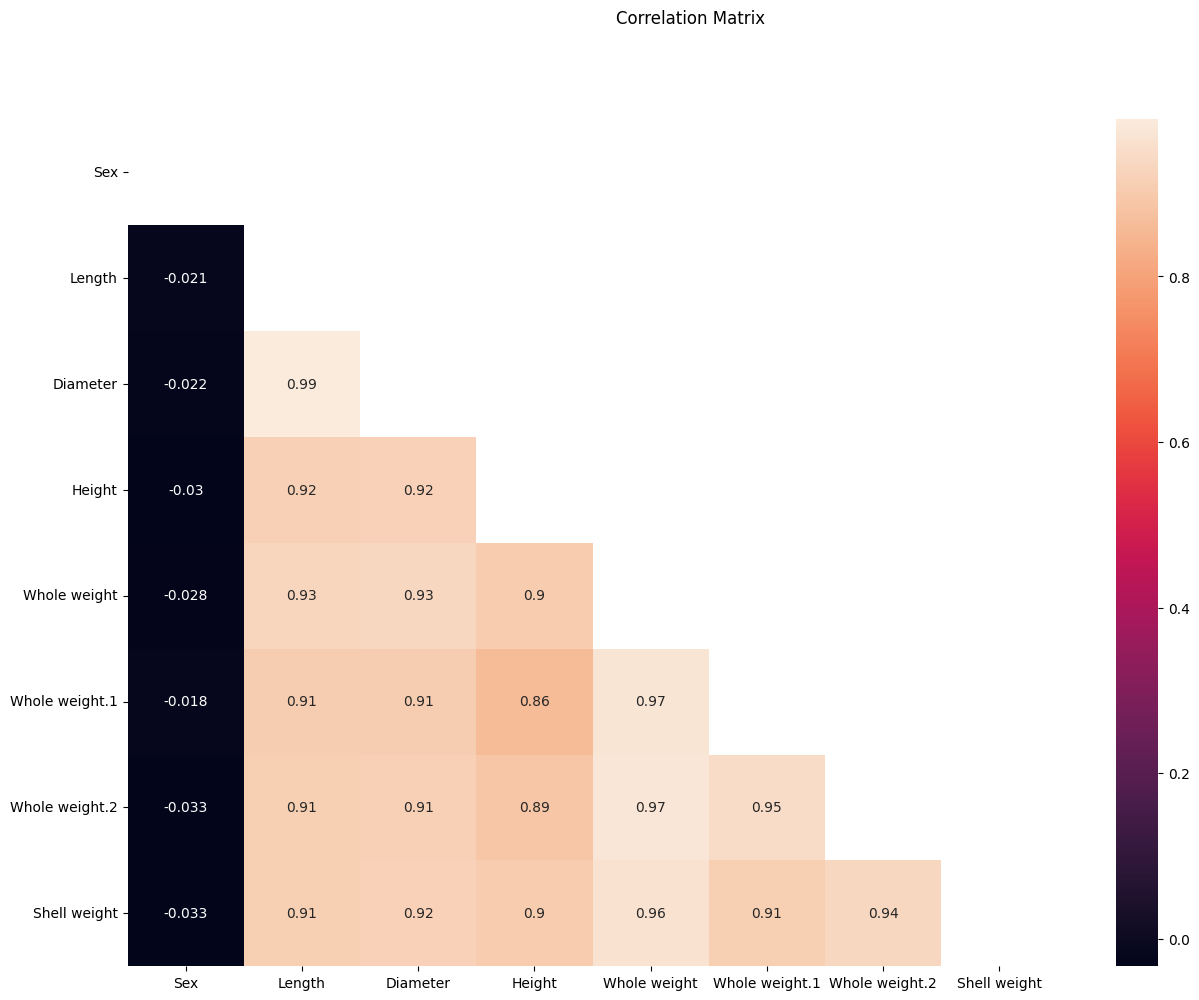

In [15]:
#correlation matrix
corr_matrix=features.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

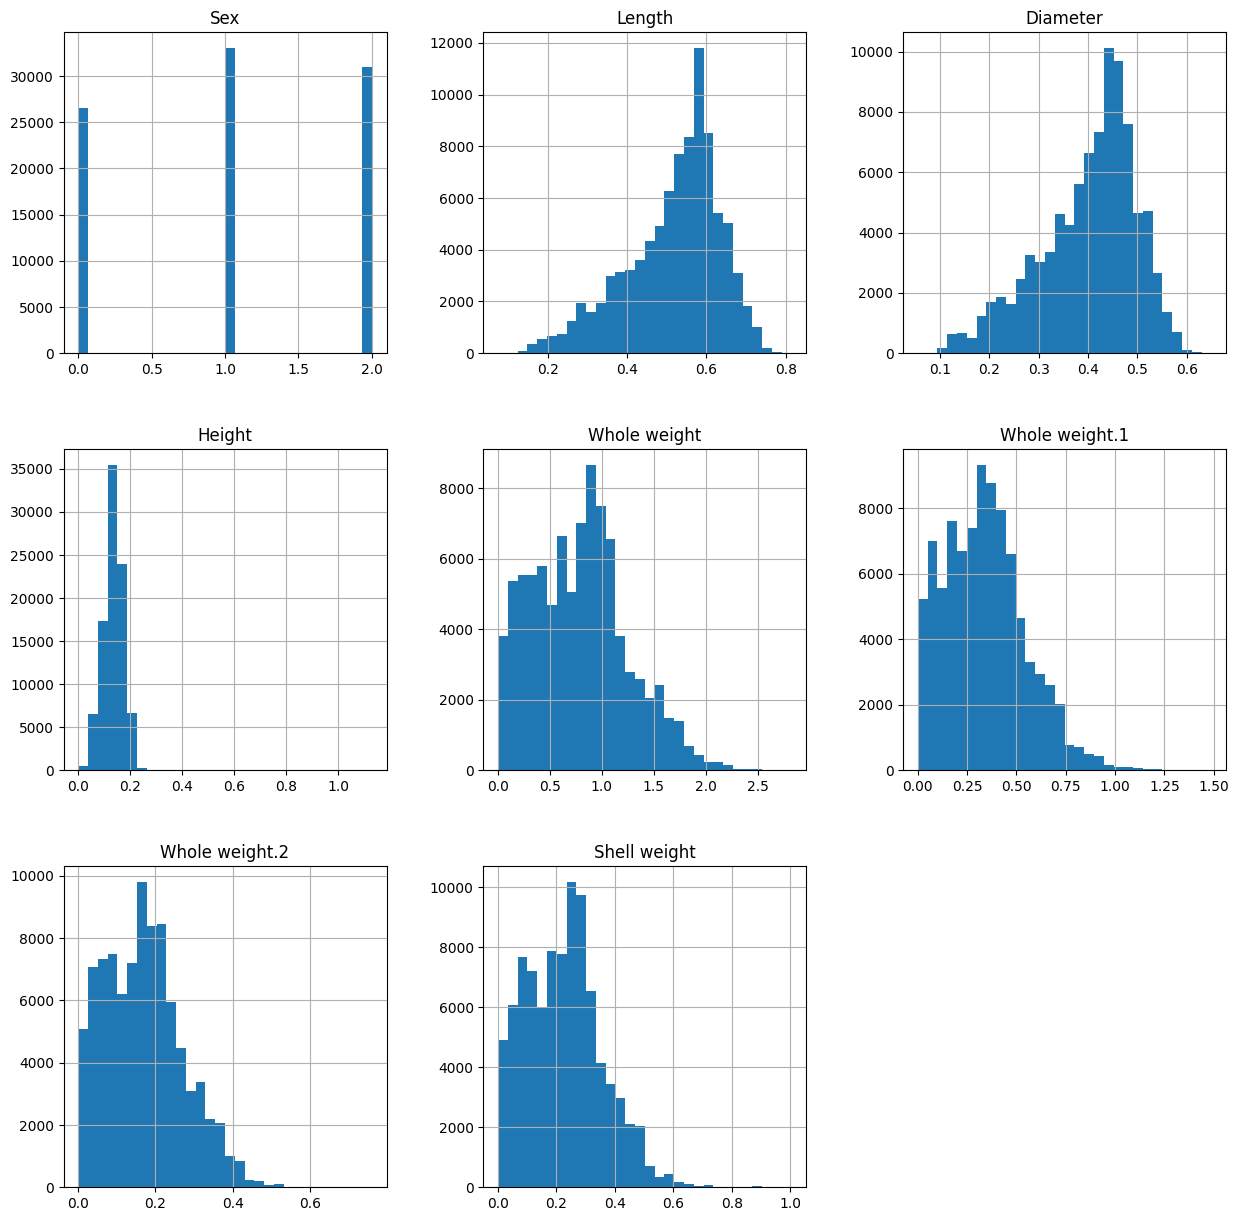

In [16]:
# # plot features as histograms
features.hist(bins=30, figsize=(15,15))
plt.show()

In [17]:
# Skew function of Pandas
skew = features.skew().sort_values(ascending=False)
skew

Whole weight.1    0.591973
Shell weight      0.479092
Whole weight.2    0.476733
Whole weight      0.429316
Height            0.309975
Sex              -0.089467
Diameter         -0.695236
Length           -0.732015
dtype: float64

In [18]:
num_cols = train.select_dtypes(include=float).columns.tolist()
num_cols

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight']

In [19]:
# train_bc= train
# train_bc[num_cols].shape

In [20]:
#remove skew
from sklearn.preprocessing import PowerTransformer
train_bc= train
bc_transformer = PowerTransformer(method = "yeo-johnson", standardize=True)
train_bc[num_cols] = pd.DataFrame(bc_transformer.fit_transform(train_bc[num_cols]))

test_bc= test
test_bc[num_cols] = pd.DataFrame(bc_transformer.transform(test_bc[num_cols]))

In [21]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
train_sc= train_bc
train_sc[num_cols]= pd.DataFrame(sc.fit_transform(train[num_cols]))
train_sc.columns= train.columns

test_sc= test_bc
test_sc[num_cols]= pd.DataFrame(sc.transform(test[num_cols]))
test_sc.columns= test.columns

In [22]:
#normalize
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

train_sc[num_cols]= normalize(train_sc[num_cols])
test_sc[num_cols]= normalize(test_sc[num_cols])

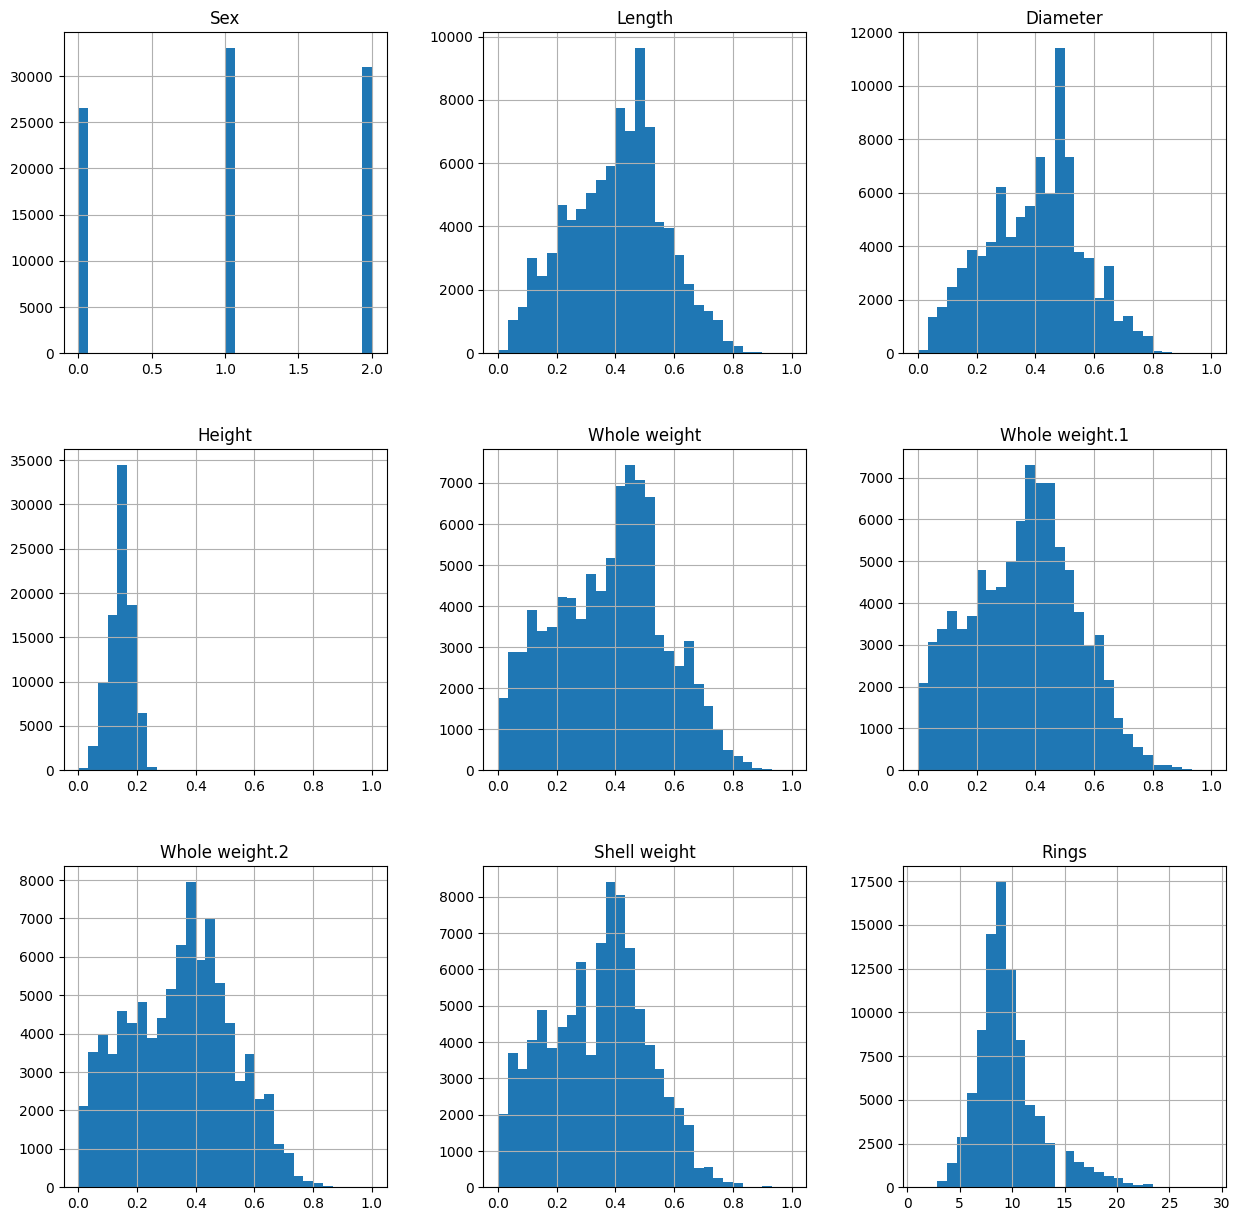

In [23]:
# # plot features as histograms
train_sc.hist(bins=30, figsize=(15,15))
plt.show()

In [24]:
def RMSLE(y_true: list, y_pred: list) -> float:
    """
    The Root Mean Squared Log Error (RMSLE) metric using only NumPy
    
    :param y_true: The ground truth labels given in the dataset
    :param y_pred: Our predictions
    :return: The RMSLE score
    """
    n = len(y_true)
    msle = np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))
    return msle

In [25]:
from sklearn.model_selection import train_test_split
X = train_sc.drop(columns = ['Rings'], axis = 1)
# y = np.log1p(train_sc['Rings'])
y = train_sc['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0, stratify=y)

In [26]:

from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_log_error

#baseline model

# #GradientBoosting         
# gb_md = GradientBoostingRegressor(loss = 'squared_error',
#                                     n_estimators = 1000, 
#                                     max_depth = 8, 
#                                     learning_rate = 0.01,
#                                     min_samples_split = 10, 
#                                     min_samples_leaf = 20).fit(X_train, y_train) 
    
# gb_pred = gb_md.predict(X_test)
# gb_msle = mean_squared_log_error(y_test, gb_pred)
# gb_rmsle = np.sqrt(gb_msle)
# print('GradientBoost of RMSLE is ==>', gb_rmsle)
# # GradientBoost of RMSLE is ==> 0.14953954800983976    
    

# #HistGradientBoosting   
# hist_md = HistGradientBoostingRegressor(loss = 'squared_error',
#                                         l2_regularization = 0.01,
#                                         early_stopping = True,
#                                         learning_rate = 0.01,
#                                         max_iter = 1000,
#                                         max_depth = 15,
#                                         max_bins = 255,
#                                         min_samples_leaf = 70,
#                                         max_leaf_nodes = 115).fit(X_train, y_train)
    
# hist_pred = hist_md.predict(X_test)
# hist_msle = mean_squared_log_error(y_test, hist_pred)
# hist_rmsle = np.sqrt(hist_msle)
# print('HistGradient of RMSLE is ==>', hist_rmsle)
# # HistGradient of RMSLE is ==> 0.1504204804153264       

# #LightGBM 
# lgb_md = LGBMRegressor(objective = 'rmse', 
#                         n_estimators = 1000,
#                         max_depth = 15,
#                         learning_rate = 0.01,
#                         num_leaves = 105,
#                         reg_alpha = 8,
#                         reg_lambda = 3,
#                         subsample = 0.6,
#                         colsample_bytree = 0.8,
#                         device = 'gpu').fit(X_train, y_train)
    
# # lgb_pred = lgb_md.predict(X_test)
# # lgm_msle = mean_squared_log_error(y_test, lgb_pred)
# # lgb_rmsle = np.sqrt(lgm_msle)
# # print('LightGBM of RMSLE is ==>', lgb_rmsle)

# lgb_pred = lgb_md.predict(X_test)
# lgb_rmsle = RMSLE(y_test, lgb_pred)
# print('LightGBM of RMSLE is ==>', lgb_rmsle)

# lgb_pred = np.expm1(lgb_md.predict(X_test))
# lgm_mse = mean_squared_error(y_test, lgb_pred)
# lgb_rmse = np.sqrt(lgm_mse)
# print('LightGBM of RMSE is ==>', lgb_rmse)

#LightGBM of RMSLE is ==> 0.14926952959686546

# #XGBoost         
# xgb_md = XGBRegressor(objective = 'reg:absoluteerror',
#                         tree_method = 'gpu_hist',
#                         eval_metric= 'rmse',
#                         colsample_bytree = 0.9, 
#                         gamma = 0.65, 
#                         learning_rate = 0.01, 
#                         max_depth = 7, 
#                         min_child_weight = 20, 
#                         n_estimators = 1000, 
#                         subsample = 0.7).fit(X_train, y_train)
# xgb_pred = xgb_md.predict(X_test)
# xgm_msle = mean_squared_log_error(y_test, xgb_pred)
# xgb_rmsle = np.sqrt(xgm_msle)
# print('XGBoost of RMSLE is ==>', xgb_rmsle)
# # XGBoost of RMSLE is ==> 0.1520093835487581

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [27]:
# import lightgbm as lgb

# #hyperparameter tuning
# import optuna

# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 100, 10000)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 2.00)
#     max_depth = trial.suggest_int('max_depth', 5, 100)
#     subsample = trial.suggest_float('subsample', 0.2, 1.0)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.2, 1.0)
#     num_leaves = trial.suggest_int('num_leaves', 1, 500)
#     min_child_weight = trial.suggest_float('min_child_weight', 0.1, 4.0)
#     reg_alpha = trial.suggest_int('reg_alpha', 0, 100),
#     reg_lambda = trial.suggest_int('reg_lambda', 0, 100)

#     model = LGBMRegressor(
#         metric = 'rmsle',
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         min_child_weight = min_child_weight,
#         num_leaves=num_leaves,
#         reg_alpha= reg_alpha,
#         reg_lambda=reg_lambda,
#         verbose= -1,
#         random_state=42
#     )
    
#     model.fit(X_train, y_train)
# #     xgb_pred = model.predict(X_test)
# #     xgm_msle = mean_squared_log_error(y_test, xgb_pred)
# #     xgb_rmsle = np.sqrt(xgm_msle)
#     xgb_pred = model.predict(X_test)
#     xgb_rmsle = RMSLE(y_test, xgb_pred)
#     return xgb_rmsle

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# best_params = study.best_params
# print("Best Hyperparameters (LightGBM):", best_params)

In [28]:
LGBMParams = {'n_estimators': 3702, 'learning_rate': 0.011356805333536809, 'max_depth': 9, 'subsample': 0.8128237296541302, 'colsample_bytree': 0.5672456297313578, 'num_leaves': 438, 'min_child_weight': 2.8319215881151436, 'reg_alpha': 63, 'reg_lambda': 33}

In [29]:
final_model = LGBMRegressor( **LGBMParams,
        metric = 'rmsle',
        verbose= -1,
        random_state=42
    )
    
final_model.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.5672456297313578,
              learning_rate=0.011356805333536809, max_depth=9, metric='rmsle',
              min_child_weight=2.8319215881151436, n_estimators=3702,
              num_leaves=438, random_state=42, reg_alpha=63, reg_lambda=33,
              subsample=0.8128237296541302, verbose=-1)

In [30]:
# predictions= np.expm1(lgb_md.predict(test_sc))
# predictions

In [31]:
predictions= final_model.predict(test_sc)
predictions

array([10.06442767,  9.79709298, 10.21121218, ..., 11.95867613,
       12.31541989,  9.22802469])

In [32]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e4/sample_submission.csv')
submission

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10
...,...,...
60406,151021,10
60407,151022,10
60408,151023,10
60409,151024,10


In [33]:
submission['Rings']= predictions
submission.to_csv('submission.csv', index=False)
submission.head()

,id,Rings
0,90615,10.064428
1,90616,9.797093
2,90617,10.211212
3,90618,10.602651
4,90619,7.633825
